In [ ]:
import warnings
warnings.filterwarnings('ignore')
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.1


In [ ]:
pip install opencv-python

In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Lucky 8/[Final Project]/Coding/startup data.csv')
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


# Data Describe

In [ ]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [ ]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

# Numeric & Non Numeric Data

## Numeric Data

In [ ]:
numerics= ['int16','int32','int64','float16','float32','float64']
display(data.select_dtypes(include=numerics).columns)
data_numerics =data.select_dtypes(include=numerics)
data_numerics.head()

Index(['Unnamed: 0', 'latitude', 'longitude', 'labels',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1


## Non Numeric Data

In [ ]:
display(data.select_dtypes(include='object').columns)
data_non_numeric= data.select_dtypes(include=['object'])
data_non_numeric.head()

Index(['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'state_code.1', 'category_code', 'object_id', 'status'],
      dtype='object')

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed


# Grafis

## boxplot

In [ ]:
features = ['age_first_funding_year', 'age_last_funding_year','age_first_milestone_year', 
               'age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd',
               'milestones','avg_participants']

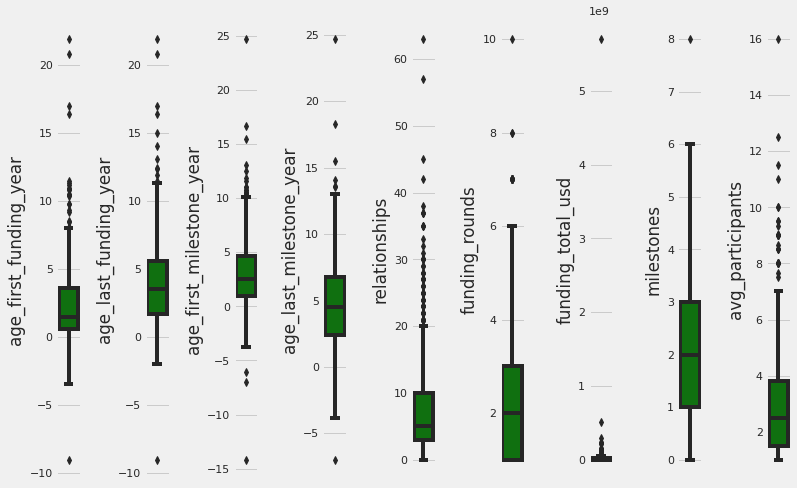

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 12, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout()

## distribusi data

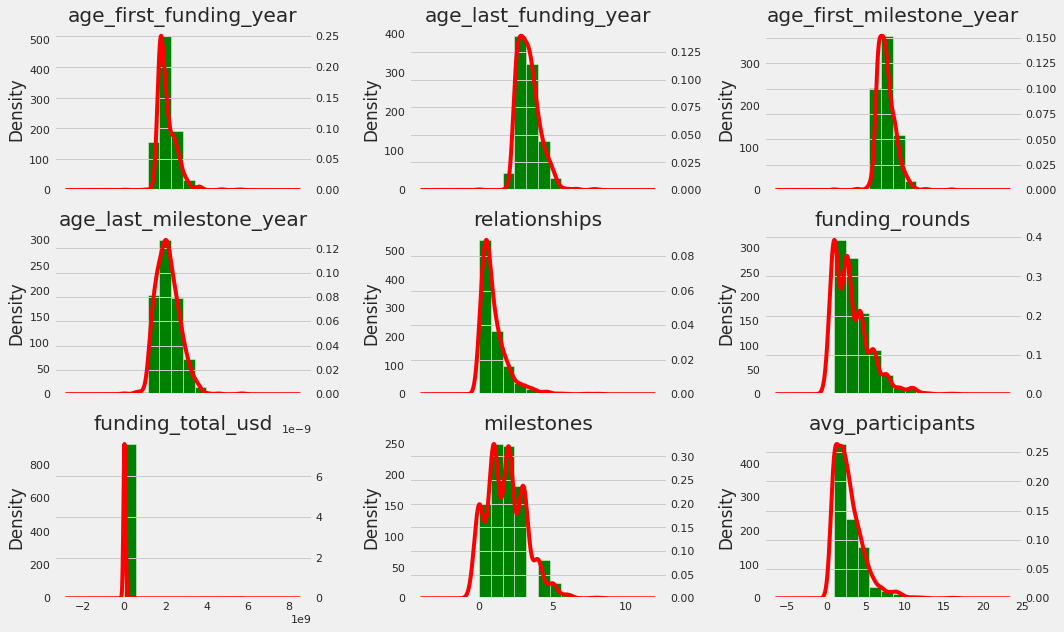

In [ ]:
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()

## matrix correlation

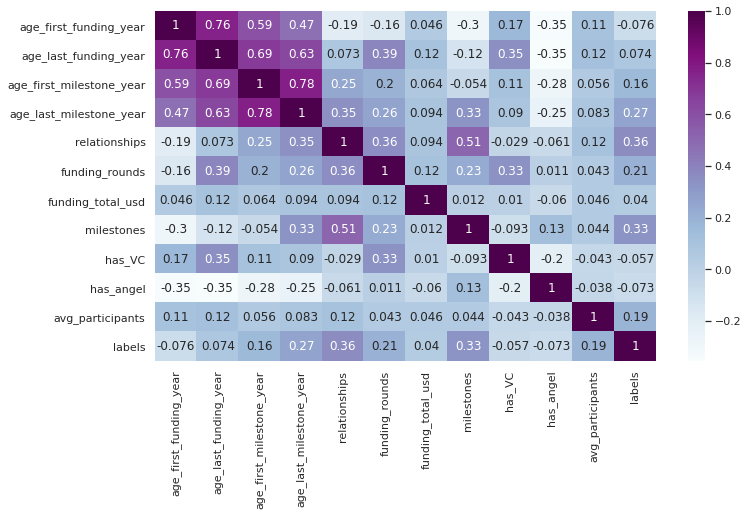

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(data[['age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones','has_VC', 'has_angel','avg_participants','labels']].corr(), cmap = "BuPu", annot=True)

# Missing Values & Duplicated Data

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,closed_at,588,63.71
1,Unnamed: 6,493,53.41
2,age_last_milestone_year,152,16.47
3,age_first_milestone_year,152,16.47
4,state_code.1,1,0.11


Pada data ditemukan missing value pada kolom:
1. closed at sebanyak 588
2. unnamed:6 sebanyak 493
3. age last milestone year sebanyak 152
4. age first milestone year sebanyak 152
5. state code1 sebanyak 1

<function matplotlib.pyplot.tight_layout>

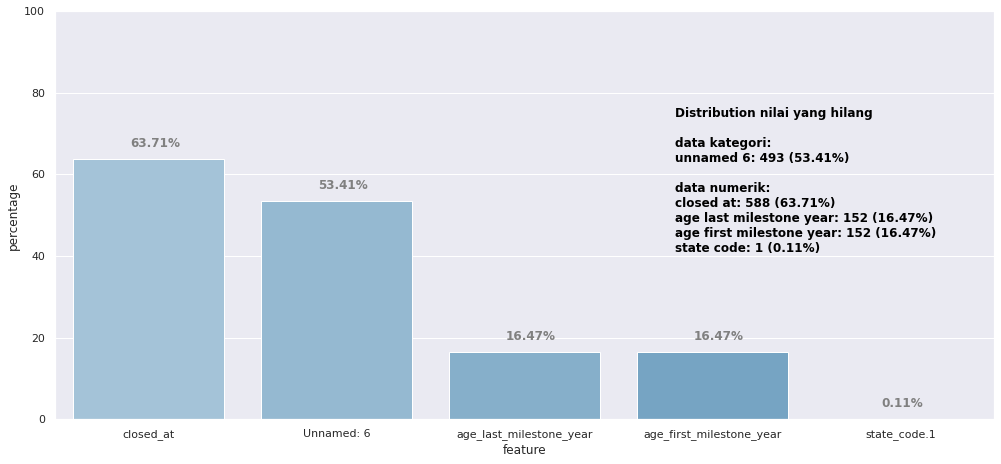

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'feature',y='percentage',data=data_missing_value,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''
Distribution nilai yang hilang

data kategori:
unnamed 6: 493 (53.41%)

data numerik:
closed at: 588 (63.71%)
age last milestone year: 152 (16.47%)
age first milestone year: 152 (16.47%)
state code: 1 (0.11%)


'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

#### Drop colom unnamed:6 & state_code.1

In [ ]:
data = data.drop(['Unnamed: 6'], axis=1)

In [ ]:
data = data.drop(['state_code.1'], axis=1)

### Duplicated Data

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.duplicated(subset=['name']).sum()

1

In [ ]:
data[data.duplicated(subset=['name'])]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,acquired


In [ ]:
data[data['name']=='Redwood Systems']

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,acquired
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,c:28482,1,0,1,1,1,0,2.25,1,acquired


In [ ]:
data=data.drop_duplicates(subset=['name'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                922 non-null    int64  
 1   state_code                922 non-null    object 
 2   latitude                  922 non-null    float64
 3   longitude                 922 non-null    float64
 4   zip_code                  922 non-null    object 
 5   id                        922 non-null    object 
 6   city                      922 non-null    object 
 7   name                      922 non-null    object 
 8   labels                    922 non-null    int64  
 9   founded_at                922 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          922 non-null    object 
 12  last_funding_at           922 non-null    object 
 13  age_first_funding_year    922 non-null    float64
 14  age_last_f

Note : Jumlah baris data berubah dari 923 menjadi 922 baris, karena menghapus baris data yang duplikat.

# Feature Engineering

### Add New Column ['last_date'] for Calculate Startup Age


In [ ]:
data['last_date']=data['closed_at'] #copy data
data['last_date']=data['last_date'].fillna('2013-12-31')
data['last_date']=pd.to_datetime(data['last_date'])

### Add New Column ['age'] for information Startup Age (Cimby & Dhani)


In [ ]:
data["founded_at"] = pd.to_datetime(data["founded_at"])

data["age"] = (data["last_date"]-data["founded_at"])
data["age"]=round(data.age/np.timedelta64(1,'Y'))

### Drop Minus Age at : 
  1. 'age'
  2. 'age_first_funding_year',
  3. 'age_last_funding_year', 
  4. 'age_first_milestone_year',
  5. 'age_last_milestone_year'

In [ ]:
data=data.drop(data[data.age<0].index)
data=data.drop(data[data.age_first_funding_year<0].index)
data=data.drop(data[data.age_last_funding_year<0].index)
data=data.drop(data[data.age_first_milestone_year<0].index)
data=data.drop(data[data.age_last_milestone_year<0].index)

## Fill value ['age_last_milestone_year'] &['age_first_milestone_year'] with 0 (Cimby)

In [ ]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(0)

In [ ]:
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(0)

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   543
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_adver

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                837 non-null    int64         
 1   state_code                837 non-null    object        
 2   latitude                  837 non-null    float64       
 3   longitude                 837 non-null    float64       
 4   zip_code                  837 non-null    object        
 5   id                        837 non-null    object        
 6   city                      837 non-null    object        
 7   name                      837 non-null    object        
 8   labels                    837 non-null    int64         
 9   founded_at                837 non-null    datetime64[ns]
 10  closed_at                 294 non-null    object        
 11  first_funding_at          837 non-null    object        
 12  last_funding_at       

Note : Jumlah baris data berubah dari 922 menjadi 837 baris, karena menghapus baris data yang berisi umur minus.

## Add New Column ["over_5years"] (Cimby)

In [ ]:
data['over_5years']=data['age'].apply(lambda x : 1 if x>=5 else 0)

# Data Visualization & Insight (Dhani)




In [ ]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['founded_at'] = pd.to_datetime(data['founded_at'])

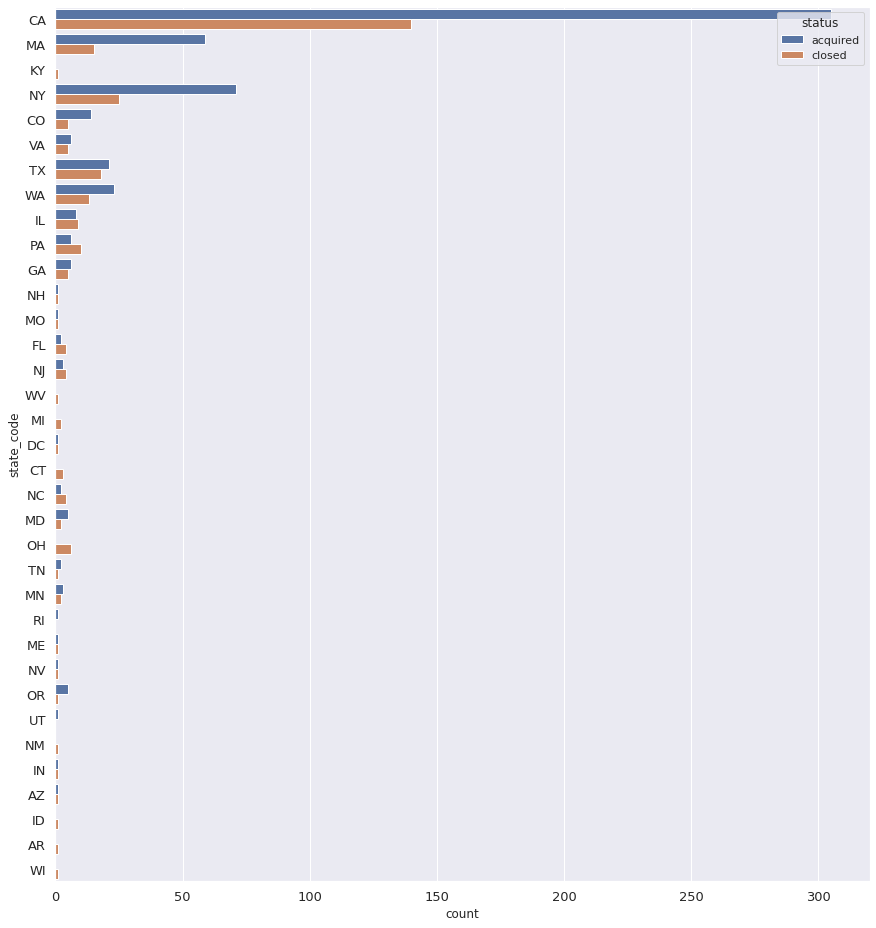

In [ ]:
plt.figure(figsize=(13,15))
sns.countplot(y=data['state_code'],hue=data['status'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

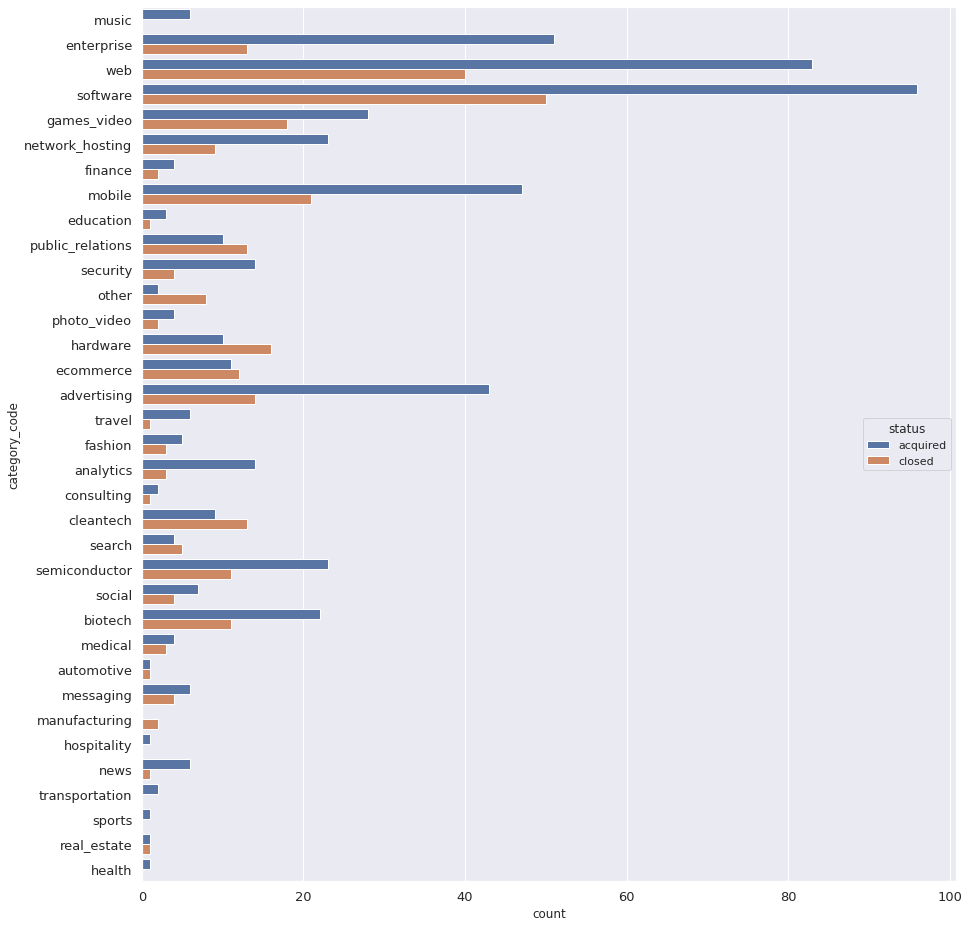

In [ ]:
plt.figure(figsize=(13,15))
sns.countplot(y=data['category_code'],hue=data['status'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

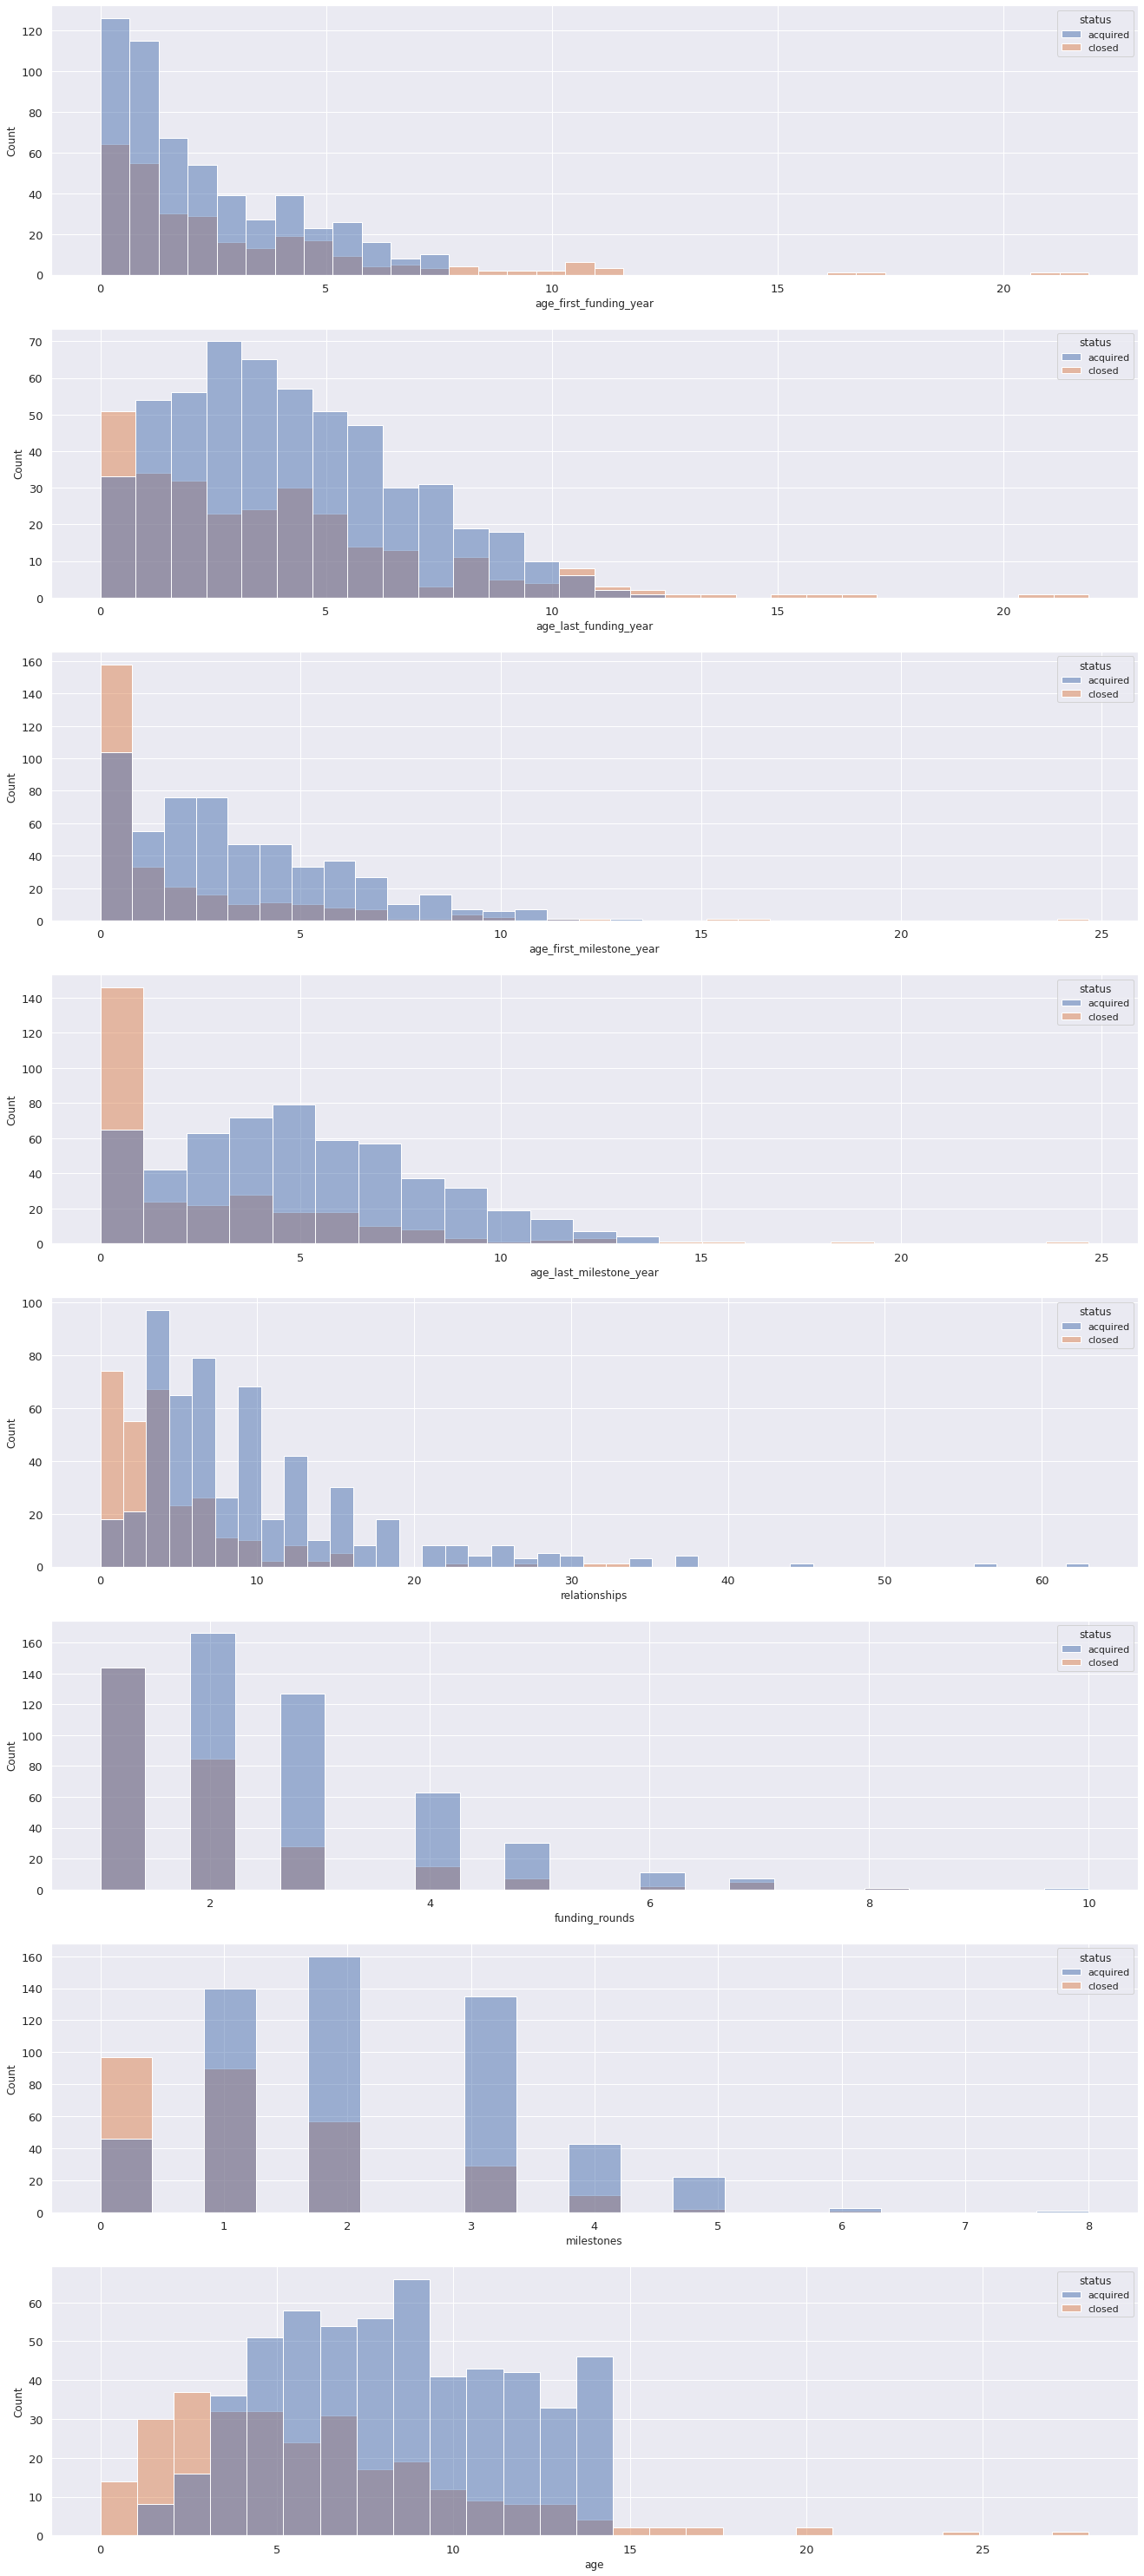

In [ ]:
features = ['age_first_funding_year', 'age_last_funding_year','age_first_milestone_year', 
            'age_last_milestone_year', 'relationships','funding_rounds',
            'milestones','age']
plt.figure(figsize=(20,50))
for i in range(0, len(features)):
    plt.subplot(8, 1, i+1)
    sns.histplot(x=data[features[i]],hue=data['status'])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13);

In [ ]:
x = ['analytics', 'automotive', 'biotech', 'cleantech', 
     'ecommerce','games_video', 'messaging', 'mobile',
     'network_hosting','photo_video','semiconductor',
     'software','web'] 
tech_nontech =[]

for i,kolom in data.iterrows():
    if kolom['category_code'] in x:
        y = 'tech'
    else:
        y = 'nontech'
    tech_nontech.append(y)    
        
data['tech_nontech'] = tech_nontech
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,over_5years,tech_nontech
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,2007-01-01,NaT,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0,1,nontech
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,2000-01-01,NaT,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0,1,nontech
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,2009-03-18,NaT,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0,1,tech
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0,1,tech
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2012-10-01,2.0,0,tech


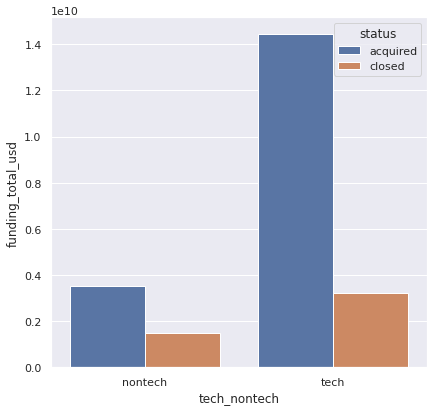

In [ ]:
data_tnt=data.groupby(['tech_nontech','status']).agg({'funding_total_usd':'sum'}).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(y='funding_total_usd', x='tech_nontech', data=data_tnt, 
            estimator=sum,hue = 'status');

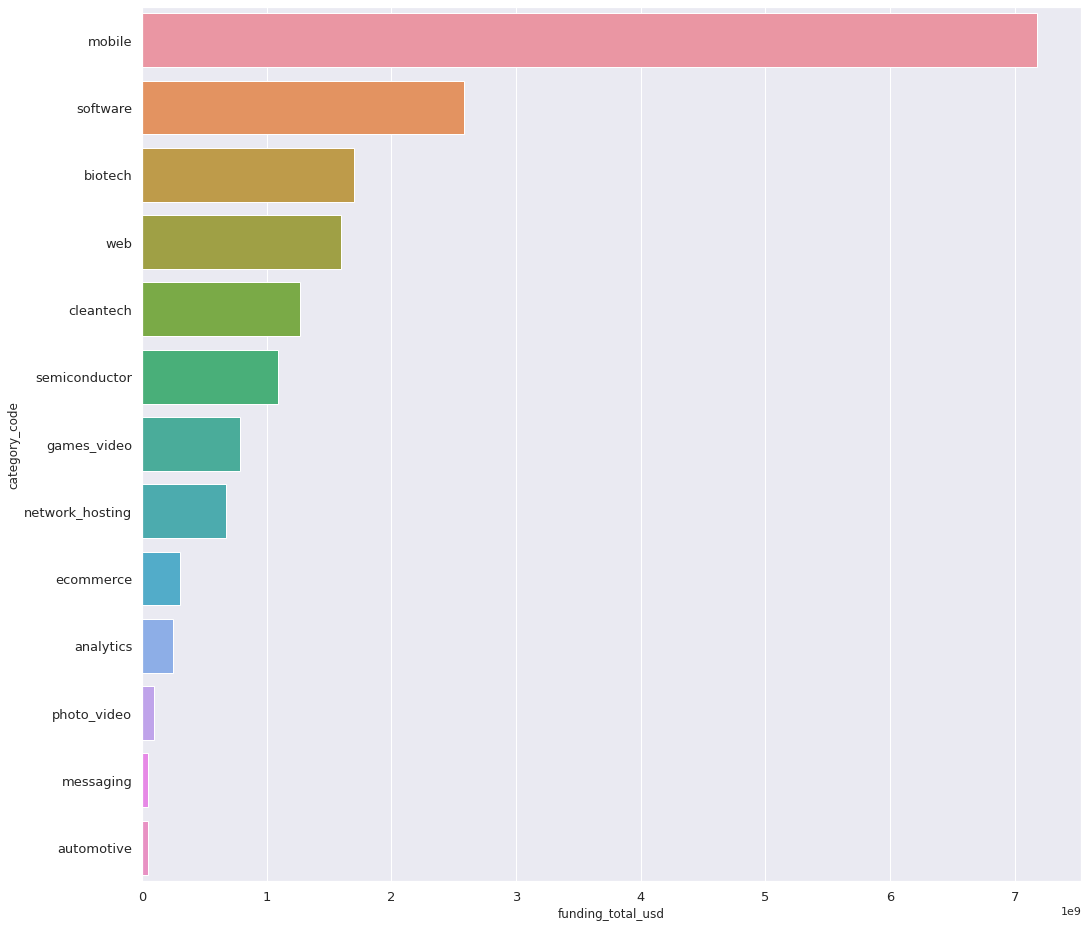

In [ ]:
tech = data[data['tech_nontech']=='tech']
nontech = data[data['tech_nontech']=='nontech']

tech_startup=tech.groupby(['category_code']).agg({'funding_total_usd':'sum'}).reset_index().sort_values('funding_total_usd',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(x='funding_total_usd', y='category_code', data=tech_startup, 
            estimator=sum)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

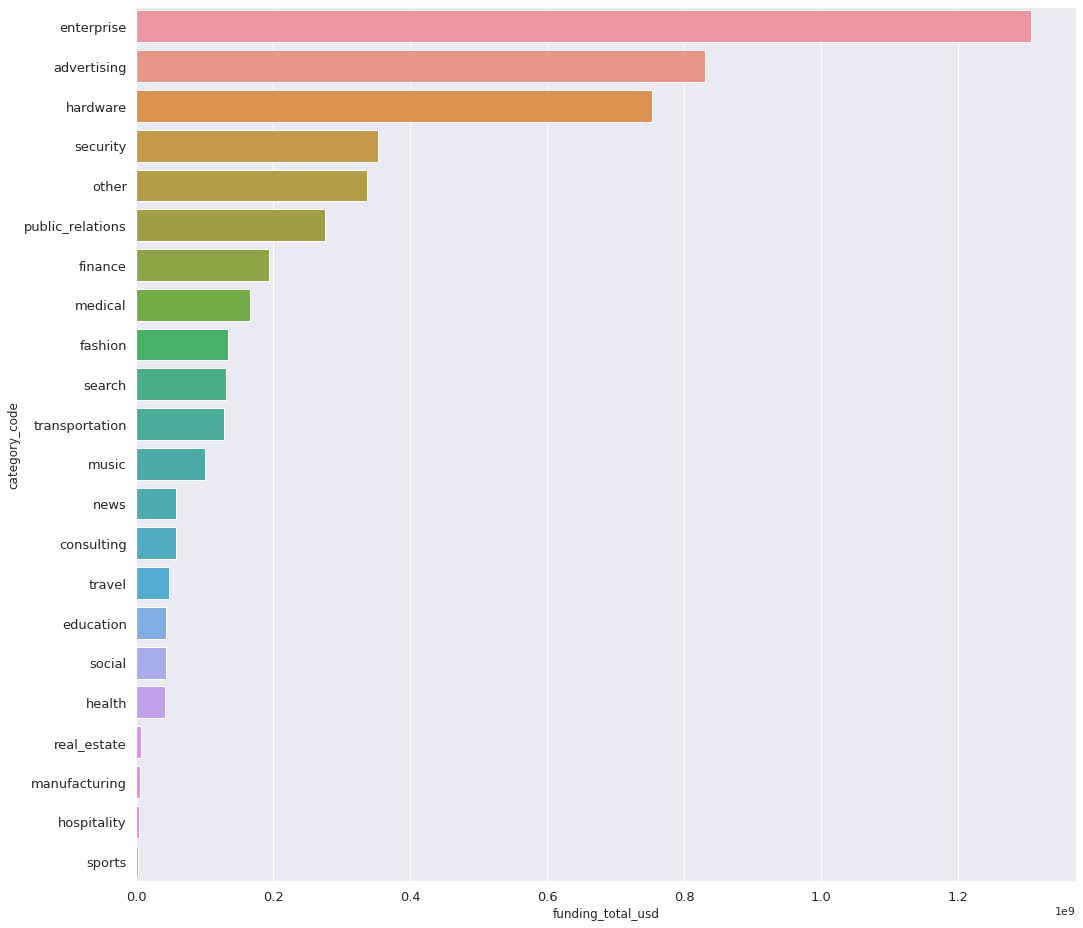

In [ ]:
nontech_startup=nontech.groupby(['category_code']).agg({'funding_total_usd':'sum'}).reset_index().sort_values('funding_total_usd',ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(x='funding_total_usd', y='category_code', data=nontech_startup, 
            estimator=sum)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);



1.   Perusahaan yang sukses mendapatkan pendanaan berasal dari California, Newyork dan Massachusetts
2.   Perusahaan dari kategori Software paling banyak mendapatkan pendanaan
3. Secara umum, perusahaan tech lebih besar menerima total uang pendanaan dibandingkan perusahaan non tech
4. perusahaan kategori mobile paling banyak mendapatkan total uang pendanaan dari kelompok tech sedangkan dari kelompok nontech kategori enterprise yang banyak mendapatkan total uang pendanaan



# Data Visualization & Insight

In [ ]:
df1=data[data['status']=='acquired']
df1


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,last_date,age,over_5years,tech_nontech
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,2007-01-01,NaT,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2013-12-31,7.0,1,nontech
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,2000-01-01,NaT,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2013-12-31,14.0,1,nontech
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,2009-03-18,NaT,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2013-12-31,5.0,1,tech
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2013-12-31,12.0,1,tech
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,RingCube Technologies,1,2005-01-01,NaT,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired,2013-12-31,9.0,1,tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,284,NY,40.742953,-73.984461,10018,c:17758,New York,TRAFFIQ,1,2006-09-06,NaT,9/6/2006,8/10/2010,0.0000,3.9288,2.9151,5.7342,16,3,18000000,3,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:17758,1,0,1,1,0,0,2.3333,1,acquired,2013-12-31,7.0,1,nontech
917,1099,WA,47.802184,-122.196307,98021,c:8339,Bothell,Dexterra,1,2000-01-01,NaT,8/17/2005,10/2/2008,5.6301,8.7589,8.5041,8.7589,9,5,122500000,2,0,0,0,0,1,mobile,0,0,1,0,0,0,0,0,0,0,c:8339,1,0,0,0,1,1,5.6000,1,acquired,2013-12-31,14.0,1,tech
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,2009-01-01,NaT,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired,2013-12-31,5.0,1,nontech
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,2009-01-01,NaT,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired,2013-12-31,5.0,1,tech


In [ ]:
df1.groupby(['name', 'status']).agg({'has_VC':sum}).sort_values('has_VC',ascending=False).reset_index()

,name,status,has_VC
0,thePlatform,acquired,1
1,Intelliden,acquired,1
2,Genesis Networks,acquired,1
3,Silver Tail Systems,acquired,1
4,Silicon Clocks,acquired,1
...,...,...,...
545,HipChat,acquired,0
546,Heartscape,acquired,0
547,HauteLook,acquired,0
548,Haute Secure,acquired,0


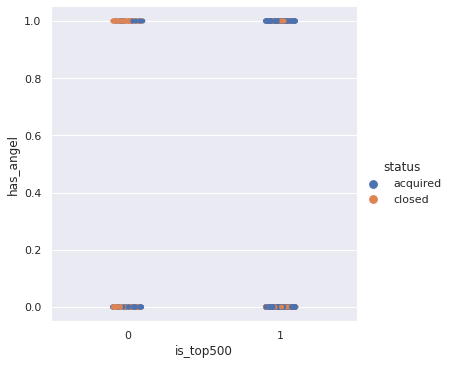

In [ ]:
sns.catplot(x='is_top500', y='has_angel', hue='status', data=data)

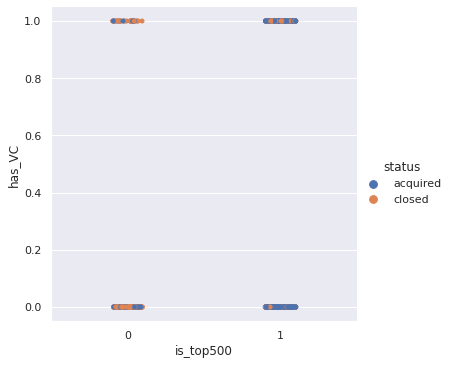

In [ ]:
sns.catplot(x='is_top500', y='has_VC', hue='status', data=data)

1. Jumlah perusahaaan yang acquired berjumlah 550 
2. Perusahaan Redwood System has 2 VC dan memiliki status acquired
3. Pada Top 500, Perusahaan yang has angel di dominasi berstatus acquired
4. Pada Top 500 dan has VC , Perusahaan yang berstatus closed dan acquired berimbang

# Data Visualization & Insight (Cimby)

---



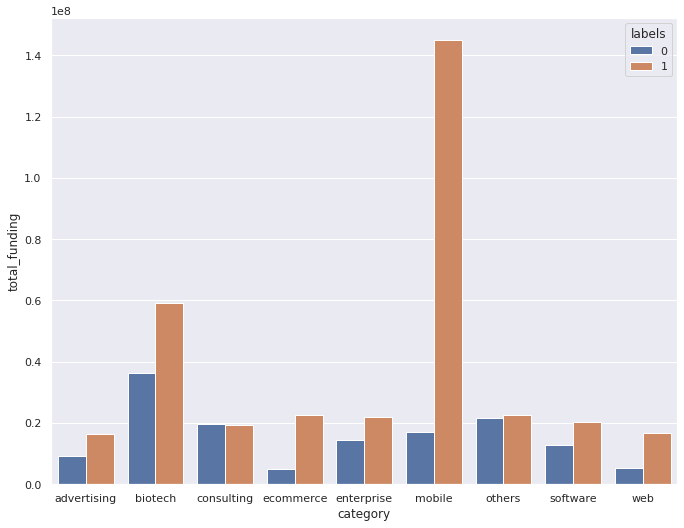

In [ ]:
data['category']= data['category_code'].apply(lambda x : 'software' if x=='software' else 'web' if x=='web' else 'mobile' if x=='mobile' else 'enterprise' if x=='enterprise' else 'advertising' if x=='advertising' else 'gamesvideo' if x=='gamesvideo' else 'ecommerce' if x== 'ecommerce' else 'biotech' if x=='biotech' else 'consulting' if x=='consulting' else 'others')
data_grp=data.groupby(['category','labels']).agg({'funding_total_usd':'mean'}).reset_index()
data_grp.columns=['category','labels','total_funding']

plt.figure(figsize=(10,8))
sns.barplot(y='total_funding', x='category', data=data_grp, 
            estimator=sum, hue='labels');


Insight : Rata-rata Total Funding tertinggi yaitu pada kategori Mobile dan potensi Sukses sangat tinggi dibanding lainnya. 
Dapat dikatakan bahwa kategori tersebut dapat lebih berpotensi mengumpulkan pendanaan lebih tinggi dibanding kategori lainnya.
Ini dapat menjadi dasar sebagai calon investor bahwa kategori Mobile merupakan kategori yang mempunyai Kapitalisasi Pasar(nilai agregat pasar sebuah perusahaan) Startup terbesar.

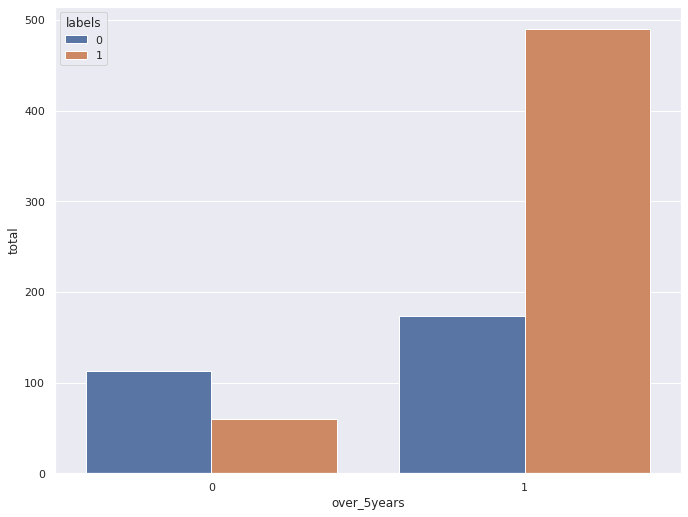

In [ ]:
data['over_5years']=data['age'].apply(lambda x : 1 if x>=5 else 0)
data_grp2=data.groupby(['over_5years','labels']).agg({'id':'count'}).reset_index()
data_grp2.columns=['over_5years','labels','total']
plt.figure(figsize=(10,8))
sns.barplot(y='total', x='over_5years', data=data_grp2, 
            estimator=sum, hue='labels');

Insight : Startup yang berusia lebih dari 5 tahun, jauh lebih berpotensi sukses dibandingkan dengan startup yang masih berusia kurang dari 5 tahun

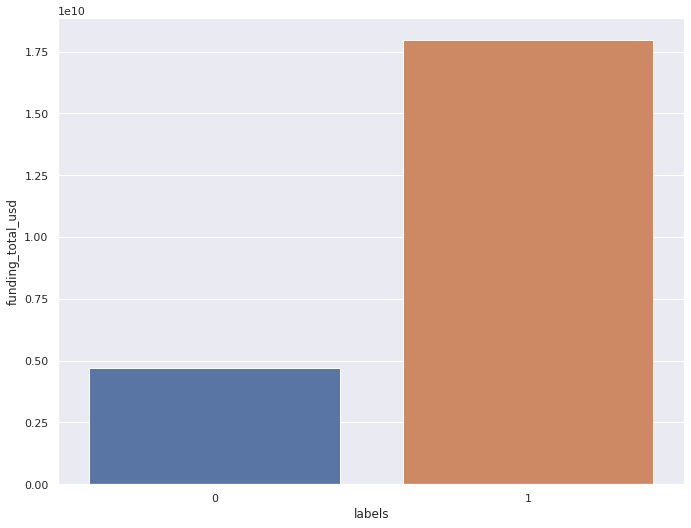

In [ ]:
data_grp3=data.groupby(['labels']).agg({'funding_total_usd':'sum'}).reset_index()

plt.figure(figsize=(10,8))
sns.barplot(y='funding_total_usd', x='labels', data=data_grp3, 
            estimator=sum);

Total akumulasi Dana yang terkumpulkan pada seluruh startup yang gagal mencapai 4 Miliar Dolar Amerika dan itu adalah kerugian yang besar.

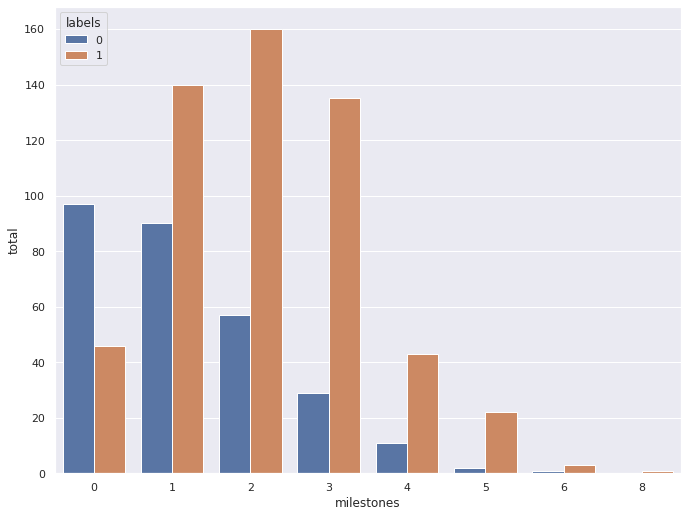

In [ ]:
data_grp4=data.groupby(['milestones','labels']).agg({'id':'count'}).reset_index()
data_grp4.columns=['milestones','labels','total']
plt.figure(figsize=(10,8))
sns.barplot(y='total', x='milestones', data=data_grp4, 
            estimator=sum, hue='labels');

insight : Startup yang memiliki milestone 1 keatas akan semakin memiliki peluang sukses yang lebih tinggi

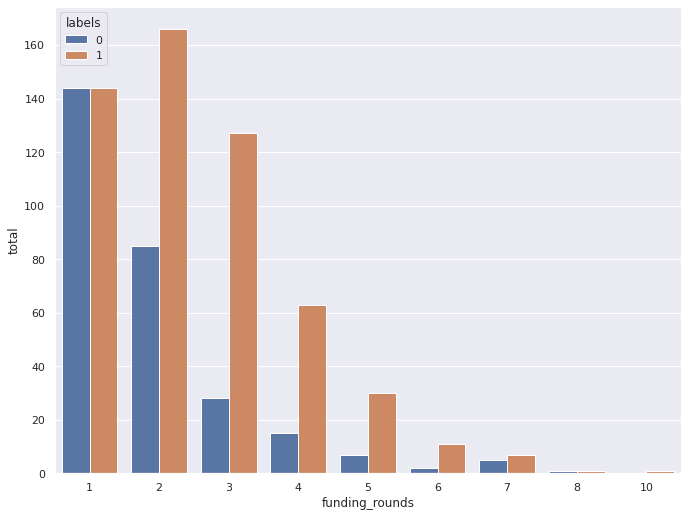

In [ ]:
data_grp5=data.groupby(['funding_rounds','labels']).agg({'id':'count'}).reset_index()
data_grp5.columns=['funding_rounds','labels','total']

plt.figure(figsize=(10,8))
sns.barplot(y='total', x='funding_rounds', data=data_grp5, 
            estimator=sum, hue='labels');

Insight : Startup yang melewati Funding Round ke-2 dan seterusnya akan memiliki peluang Sukses yang lebih tinggi.

## Succes Rate by Age

In [ ]:
data_grp_3=data[data['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=data.groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3

,age,total_succes,total,succes_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,83,61.45
4,6.0,58,82,70.73
5,7.0,54,85,63.53
6,8.0,56,73,76.71
7,9.0,66,85,77.65
8,10.0,41,53,77.36
9,11.0,43,52,82.69


<function matplotlib.pyplot.tight_layout>

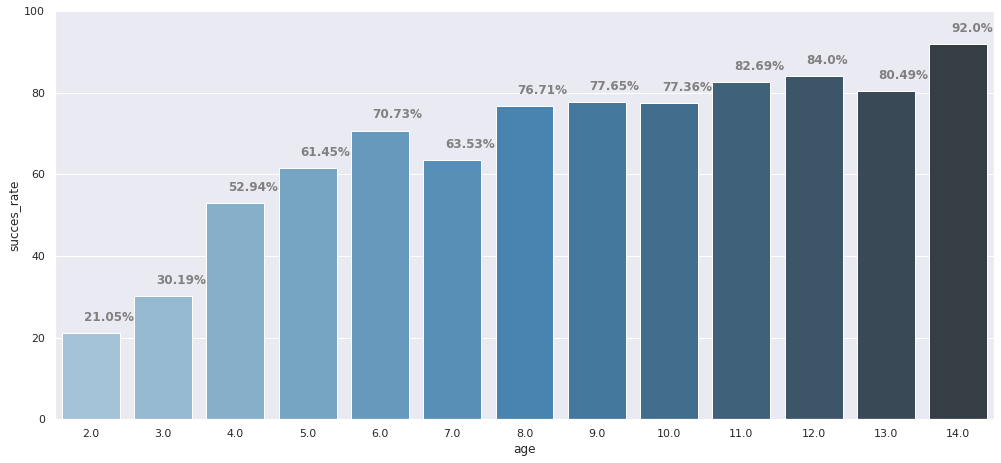

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

## Succes Rate by Milestones

In [ ]:
data_grp_5=data[data['labels']==1].groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_5.columns=['milestones','total_succes']

data_grp_6=data.groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_6.columns=['milestones','total']

data_grp_5=data_grp_5.merge(data_grp_6,
                           on='milestones')
data_grp_5['succes_rate']=round((data_grp_5['total_succes']/data_grp_5['total'])*100,2)

data_grp_5

,milestones,total_succes,total,succes_rate
0,0,46,143,32.17
1,1,140,230,60.87
2,2,160,217,73.73
3,3,135,164,82.32
4,4,43,54,79.63
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


<function matplotlib.pyplot.tight_layout>

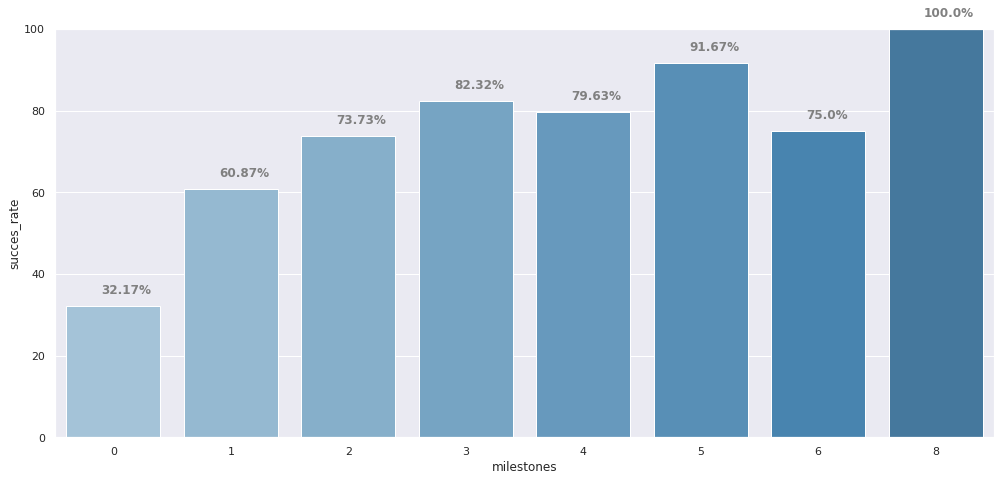

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='succes_rate',data=data_grp_5,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_5))
y = data_grp_5['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

# Success Rate by Relationship

In [ ]:
data['Relationships Range'] = data['relationships'].apply(lambda x : 'relationship 0' if x==0 else 'relationships >10' if x>10 else 'relationships 1-10' )
data20 = data.groupby(['Relationships Range', 'labels']).agg({'id' : 'count'}).reset_index()
data20_pv = pd.pivot_table(data20,
                          index=['Relationships Range'],
                          columns=['labels'],
                          values=['id']).reset_index()
data20_pv.columns = ['Relationships Range', 'Closed', 'Acquired']
data20_pv['Total Company'] = data20_pv['Closed']+data20_pv['Acquired']
data20_pv['Success Rate'] = round(data20_pv['Acquired']/data20_pv['Total Company']*100,2)
data20_pv


In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x = 'Relationships Range',y='Success Rate',data=data20_pv,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data20_pv['Relationships Range']))
y = data20_pv['Success Rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
  
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Normalization (Dhani)

In [ ]:
norm = ['age_first_funding_year', 'relationships', 'funding_total_usd']

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
data = data.copy()
for var in norm:
    data['norm_'+var]=MinMaxScaler().fit_transform(data[var].values.reshape(len(data), 1))

In [ ]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age,over_5years,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.00000,837.000000,837.000000,837.00000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,570.885305,38.413607,-103.700438,0.657109,2.428178,4.127146,2.803090,4.124999,7.734767,2.317802,2.707489e+07,1.820789,0.530466,0.114695,0.088411,0.046595,0.218638,0.174432,0.146953,0.081243,0.076464,0.068100,0.054958,0.027479,0.039427,0.003584,0.32736,0.328554,0.231780,0.51374,0.406213,0.240143,0.105137,2.891595,0.826762,7.758662,0.793309,0.110896,0.122774,0.004748
std,334.355591,3.695816,21.873513,0.474959,2.498499,2.935108,2.845093,3.399958,7.282830,1.403799,1.990400e+08,1.326541,0.499369,0.318844,0.284061,0.210896,0.413570,0.379708,0.354271,0.273371,0.265897,0.252069,0.228035,0.163572,0.194724,0.059797,0.46953,0.469968,0.422222,0.50011,0.491419,0.427426,0.306914,1.898747,0.378679,3.678993,0.405174,0.114108,0.115600,0.034919
min,1.000000,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,37.386778,-122.186760,0.000000,0.679500,1.917800,0.328800,1.049300,3.000000,1.000000,3.250000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.500000,1.000000,5.000000,1.000000,0.031033,0.047619,0.000568
50%,577.000000,37.779281,-118.341449,1.000000,1.665800,3.706800,2.161600,3.975300,5.000000,2.000000,1.050000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,2.500000,1.000000,7.000000,1.000000,0.076078,0.079365,0.001840
75%,866.000000,40.730646,-77.367981,1.000000,3.758900,5.715100,4.164400,6.224700,10.000000,3.000000,2.541330e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,4.000000,1.000000,10.000000,1.000000,0.171671,0.158730,0.004457
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,16.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000


# Split Train Test Data (arsha)

In [ ]:
# Split Feature Vector and Label
X = data[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 
          'avg_participants','is_top500',

          
          
          ]]
y = data['labels'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

from imblearn import under_sampling, over_sampling

# Oversampling
X_train, y_train = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)


# Modeling

## Logistic Regression (Dhani)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict the test data
y_predicted = logreg.predict(X_test)
y_predicted_train = logreg.predict(X_train)
y_predicted

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)

regression = LogisticRegression(random_state=42)
regression.fit(X_train, y_train)
print("Train Accuracy:",regression.score(X_train, y_train))
print("Test Accuracy:",regression.score(X_test, y_test))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))




confusion matrix
[[ 82  15]
 [ 35 120]]

accuracy
0.8015873015873016

classification report
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        97
           1       0.89      0.77      0.83       155

    accuracy                           0.80       252
   macro avg       0.79      0.81      0.80       252
weighted avg       0.82      0.80      0.80       252

Train Accuracy: 0.8012658227848102
Test Accuracy: 0.8015873015873016
AUC Score: 0.8097771865646823


### Business Simulation

In [ ]:
y_predicted=pd.DataFrame(y_predicted)
y_test=pd.DataFrame(y_test)

y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

X_test['funding_total_usd']=data['funding_total_usd']
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

X_test['y_predicted']=y_predicted
X_test['y_test']=y_test
X_test.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,funding_total_usd,y_predicted,y_test
0,0.111111,0.091465,0.005261,4.3863,1.5836,4.1918,4,2,9.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,2.0000,1,30000000,1,0
1,0.412698,0.038039,0.009647,3.9370,3.4822,7.6658,4,5,9.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2.7500,1,55000000,1,1
2,0.031746,0.360236,0.007489,10.6658,0.4137,0.4137,3,1,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.6667,1,42700000,0,0
3,0.015873,0.082458,0.000524,1.8055,0.0000,0.0000,1,0,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0000,1,3000000,0,0
4,0.111111,0.005257,0.007367,1.1507,0.0000,0.0000,3,0,14.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,2.6667,1,42000000,1,1


#### Risk Management

##### Total True Fail Startup in Data Test :

In [ ]:
y_test[y_test['labels']==0].count()

NameError: ignored

##### Predict Fail Startups

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['y_predicted'].count()

##### Potensial Loss without ML :

In [ ]:
X_test[(X_test['y_test']==0)]['funding_total_usd'].sum()

##### Saving Fund Investment with Predict ML :

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['funding_total_usd'].sum()

##### Potensial Loss with ML (False Positive):

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==1)]['funding_total_usd'].sum()

#### Fund Investment Management

##### Total True Succes Startup in Data Test :

In [ ]:
y_test[y_test['labels']==1].count()

labels    155
dtype: int64

##### Predict Succes Startups

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==1)]['y_predicted'].count()

120

 ##### Total Fund Investment without ML

In [ ]:
X_test[(X_test['y_test']==1)]['funding_total_usd'].sum()

3277389707

##### Total Fund Investment after ML

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==1)]['funding_total_usd'].sum()

2755030288

##### Reduce Fund (False Negative)

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==0)]['funding_total_usd'].sum()

522359419

## K-nearest Neighbor (arsha)

In [ ]:
# Split Feature Vector and Label
X = data[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 'avg_participants','is_top500',

          
          
          ]]
y = data['labels'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

from imblearn import under_sampling, over_sampling

# Oversampling
X_train, y_train = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predict the test data
y_predicted = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

regression = KNeighborsClassifier()
regression.fit(X_train, y_train)
print("Train Accuracy:",regression.score(X_train, y_train))
print("Test Accuracy:",regression.score(X_test, y_test))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))



confusion matrix
[[ 66  31]
 [ 29 126]]

accuracy
0.7619047619047619

classification report
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        97
           1       0.80      0.81      0.81       155

    accuracy                           0.76       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.76      0.76      0.76       252

Train Accuracy: 0.8518987341772152
Test Accuracy: 0.7619047619047619
AUC Score: 0.7466577984702362


### Tune Hyperparameter with RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#List Hyperparameters yang akan diuji
n_neighbors = list(range(1,30))
p=[1,2]

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

# Init Logres dengan Gridsearch, cross validation = 5
knn2 = KNeighborsClassifier()
clf = RandomizedSearchCV(knn2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.64      0.51      0.57        97
           1       0.73      0.83      0.77       155

    accuracy                           0.70       252
   macro avg       0.69      0.67      0.67       252
weighted avg       0.70      0.70      0.69       252



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train,y_train)
y_predicted = dt.predict(X_test)
y_predicted_train = dt.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

print("Train Accuracy:",dt.score(X_train, y_train))
print("Test Accuracy:",dt.score(X_test, y_test))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))



confusion matrix
[[ 62  35]
 [ 14 141]]

accuracy
0.8055555555555556

classification report
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        97
           1       0.80      0.91      0.85       155

    accuracy                           0.81       252
   macro avg       0.81      0.77      0.78       252
weighted avg       0.81      0.81      0.80       252

Train Accuracy: 0.8291139240506329
Test Accuracy: 0.8055555555555556
AUC Score: 0.7744263385433987


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# list of hyperparameter
max_depth = [10] # Maximum number of levels in tree
min_samples_split = [1, 2] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 3, 4, 5] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2', 'none'] # Number of features to consider at every split

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Nilai hyperparameters terbaik
print('Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best Min Samples Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best Min Samples Leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

Max Depth: 10
Best Min Samples Split: 2
Best Min Samples Leaf: 4
Best Max Features: log2
              precision    recall  f1-score   support

           0       0.63      0.68      0.66        97
           1       0.79      0.75      0.77       155

    accuracy                           0.73       252
   macro avg       0.71      0.72      0.71       252
weighted avg       0.73      0.73      0.73       252



## Random Forest (Cimby)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# lengkapi script di area ini
rf=RandomForestClassifier(max_depth=4,random_state=42)
rf.fit(X_train,y_train)

#predict
y_predicted = rf.predict(X_test)

#eval
print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))


from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

print("Train Accuracy:",rf.score(X_train, y_train))
print("Test Accuracy:",rf.score(X_test, y_test))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))


confusion matrix
[[ 69  28]
 [ 21 134]]

accuracy
0.8055555555555556

classification report
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        97
           1       0.83      0.86      0.85       155

    accuracy                           0.81       252
   macro avg       0.80      0.79      0.79       252
weighted avg       0.80      0.81      0.80       252

Train Accuracy: 0.8253164556962025
Test Accuracy: 0.8055555555555556
AUC Score: 0.7879281676089125


### Tune Hyperparameter with Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#List Hyperparameters yang akan diuji
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 700)] # Number of trees in random forest
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(1, 700)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 50)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 50)] # Minimum number of samples required at each leaf node
bootstrap = [True,False] # Method of selecting samples for training each tree
n_jobs = [-1]
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'n_jobs':n_jobs}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=10, random_state=42)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best bootstrap:', best_model.best_estimator_.get_params()['bootstrap'])
print('Best n_jobs:', best_model.best_estimator_.get_params()['n_jobs'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(X_test)#Check performa dari model

#eval
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))


print(classification_report(y_test, y_predicted))


from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('ROC Score:',roc_auc_score(y_test, y_predicted))


regression = RandomizedSearchCV(rf, hyperparameters, cv=10, random_state=42)
regression.fit(X_train,y_train)
print("Train Accuracy:",regression.score(X_train, y_train))
print("Test Accuracy:",regression.score(X_test, y_test))


Best n_estimators: 272
Best max_features: log2
Best max_depth: 357
Best min_samples_split: 21
Best min_samples_leaf: 2
Best bootstrap: True
Best n_jobs: -1

confustion matrix
[[ 72  25]
 [ 21 134]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        97
           1       0.84      0.86      0.85       155

    accuracy                           0.82       252
   macro avg       0.81      0.80      0.81       252
weighted avg       0.82      0.82      0.82       252

ROC Score: 0.8033920851346857
Train Accuracy: 0.9417721518987342
Test Accuracy: 0.8174603174603174


# Adaboost (bagas)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
y_predicted = ab.predict(X_test)
y_predicted_train = ab.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix
print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

regression = AdaBoostClassifier(random_state=42)
regression.fit(X_train, y_train)
print("Train Accuracy:",regression.score(X_train, y_train))
print("Test Accuracy:",regression.score(X_test, y_test))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))


confusion matrix
[[ 78  19]
 [ 21 134]]

accuracy
0.8412698412698413

classification report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.88      0.86      0.87       155

    accuracy                           0.84       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.84      0.84      0.84       252

Train Accuracy: 0.8873417721518987
Test Accuracy: 0.8412698412698413
AUC Score: 0.8343199201862321


# Business Simulation

In [ ]:
y_predicted=pd.DataFrame(y_predicted)
y_test=pd.DataFrame(y_test)

y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

X_test['funding_total_usd']=data['funding_total_usd']
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

X_test['y_predicted']=y_predicted
X_test['y_test']=y_test
X_test.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,funding_total_usd,y_predicted,y_test
0,0.111111,0.091465,0.005261,4.3863,1.5836,4.1918,4,2,9.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,2.0000,1,30000000,1,0
1,0.412698,0.038039,0.009647,3.9370,3.4822,7.6658,4,5,9.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2.7500,1,55000000,1,1
2,0.031746,0.360236,0.007489,10.6658,0.4137,0.4137,3,1,12.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,3.6667,1,42700000,0,0
3,0.015873,0.082458,0.000524,1.8055,0.0000,0.0000,1,0,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0000,1,3000000,0,0
4,0.111111,0.005257,0.007367,1.1507,0.0000,0.0000,3,0,14.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,2.6667,1,42000000,1,1


## Risk Management

### Total True Fail Startup in Data Test :

In [ ]:
y_test[y_test['labels']==0].count()

NameError: ignored

### Predict Fail Startups

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['y_predicted'].count()

NameError: ignored

### Potensial Loss without ML :

In [ ]:
X_test[(X_test['y_test']==0)]['funding_total_usd'].sum()

### Saving Fund Investment with Predict ML :

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['funding_total_usd'].sum()

### Potensial Loss with ML (False Positive):

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==1)]['funding_total_usd'].sum()

## Fund Investment Management

### Total True Succes Startup in Data Test :

In [ ]:
y_test[y_test['labels']==1].count()

labels    155
dtype: int64

### Predict Succes Startups

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==1)]['y_predicted'].count()

134

 ### Total Fund Investment without ML

In [ ]:
X_test[(X_test['y_test']==1)]['funding_total_usd'].sum()

3277389707

### Total Fund Investment after ML

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==1)]['funding_total_usd'].sum()

3037137789

### Reduce Fund (False Negative)

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==0)]['funding_total_usd'].sum()

240251918

# Adaboost with Hyperparameter Tuning (bagas)

In [ ]:
# Split Feature Vector and Label
X = data[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 'avg_participants','is_top500',

          
          
          ]]
y = data['labels'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

from imblearn import under_sampling, over_sampling

# Oversampling
X_train, y_train = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                   'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 500)],
                   'learning_rate':[0.1, 0.3, 0.5, 0.7, 1, 2, 3],
                   'algorithm' : ['SAMME', 'SAMME.R']

                  }

# Init Logres dengan Gridsearch, cross validation = 5
ab = AdaBoostClassifier(random_state=42)
clf = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring='recall',random_state=42)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('best algorithm:', best_model.best_estimator_.get_params()['algorithm'])

#Prediksi menggunakan model baru
y_predicted = best_model.predict(X_train)
y_predicted = best_model.predict(X_test)#Check performa dari model


print(classification_report(y_test, y_predicted))
# roc_auc_score(y_test, y_pred)

Best n_estimators: 123
Best learning_rate: 1
best algorithm: SAMME
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        97
           1       0.88      0.86      0.87       155

    accuracy                           0.84       252
   macro avg       0.83      0.84      0.83       252
weighted avg       0.84      0.84      0.84       252



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_predicted = xgb.predict(X_test.values)



from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_predicted)




confustion matrix
[[ 74  23]
 [ 19 136]]

accuracy
0.8333333333333334

classification report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        97
           1       0.86      0.88      0.87       155

    accuracy                           0.83       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.83      0.83       252



0.820152976388427

### Feature Importance (bagas)

In [ ]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.42164
Feature: 1, Score: 0.15917
Feature: 2, Score: 0.05146
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00637
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01756
Feature: 8, Score: 0.27497
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01388
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01743
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.03750
Feature: 31, Score: 0.00000


Text(0.5, 1.0, 'feature importance score')

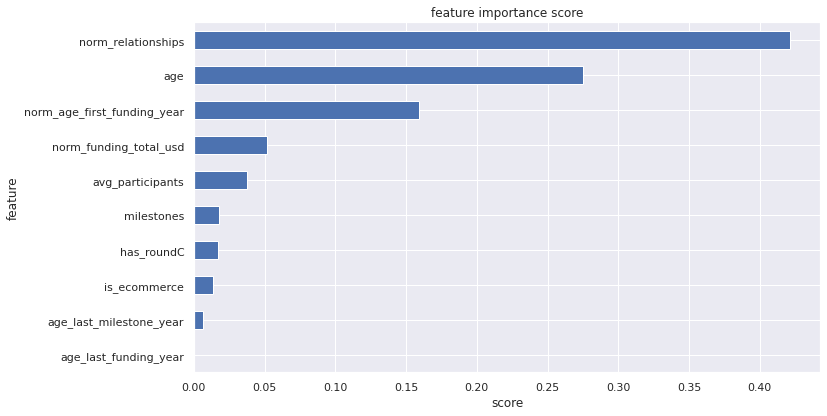

In [ ]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')